# 0. imports

In [1]:
import requests
import pandas
import json

# 1. GraphQL request to Pandas dataframe

## 1.1 Extracting a single ressource

Get the following info of the anime "Cowboy Bebop":
- id
- title
    - romaji
    - english
    - native
- season of release
- year of release
- source material (light novel, manga, etc)
- number of episodes
- popularity

Usefull ressources:
- https://anilist.gitbook.io/anilist-apiv2-docs/overview/graphql/getting-started
- json.loads() # convert string with json format to dict
- pandas.json_normalize() # Convert dict to dataframe

In [2]:
query = '''
query ($title: String)
{
  Media (search : $title) {
    id
    title {
      romaji
      english
      native
      userPreferred
    }
    season
    seasonYear
    source
    episodes
    popularity
  }
}
'''

# Define our query variables and values that will be used in the query request
variables = {
    'title': 'Cowboy Bebop'
}

url = 'https://graphql.anilist.co'

# Make the HTTP Api request
response = requests.post(url, json={'query': query, 'variables': variables})
resultDict = response.json()['data']['Media']
resultDataFrame  = pandas.json_normalize(resultDict)
resultDataFrame

,id,season,seasonYear,source,episodes,popularity,title.romaji,title.english,title.native,title.userPreferred
0,1,SPRING,1998,ORIGINAL,26,289924,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,Cowboy Bebop


## 1.2 Extracting multiple ressources (one page)

Extract 10 animes from 2020 winter season (use pagination) and format the same infos as previously into a pandas dataframe.
Usefull ressources:
- https://anilist.gitbook.io/anilist-apiv2-docs/overview/graphql/pagination
- display() # Can be used to print stylish dataframe along the process

In [3]:
query = '''
query ($id: Int, $page: Int, $perPage: Int, $year : Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        media (id: $id, season: WINTER, seasonYear: $year) {
            id
            
            title {
              romaji
              english
              native
              userPreferred
            }
            season
            seasonYear
            source
            episodes
            popularity
        }
    }
}
'''
variables = {
    'year': 2020,
    'page': 1,
    'perPage': 10
}
url = 'https://graphql.anilist.co'

response = requests.post(url, json={'query': query, 'variables': variables})

resultDict = response.json()['data']['Page']['media']
resultDataFrame  = pandas.json_normalize(resultDict)
resultDataFrame

,id,season,seasonYear,source,episodes,popularity,title.romaji,title.english,title.native,title.userPreferred
0,98515,WINTER,2020,LIGHT_NOVEL,12,10231,Hatena☆Illusion,Hatena Illusion,はてな☆イリュージョン,Hatena☆Illusion
1,99807,WINTER,2020,OTHER,12,13830,22/7,22/7 (nanabun no nijyuuni),22/7 （ナナブンノニジュウニ）,22/7
2,100643,WINTER,2020,MANGA,1,86842,Made in Abyss: Fukaki Tamashii no Reimei,Made in Abyss: Dawn of the Deep Soul,メイドインアビス 深き魂の黎明,Made in Abyss: Fukaki Tamashii no Reimei
3,101168,WINTER,2020,MANGA,24,71939,Plunderer,Plunderer,プランダラ,Plunderer
4,101350,WINTER,2020,MANGA,13,24355,pet,pet,pet,pet
5,101367,WINTER,2020,LIGHT_NOVEL,13,14397,Majutsushi Orphen Hagure Tabi,Sorcerous Stabber Orphen,魔術士オーフェンはぐれ旅,Majutsushi Orphen Hagure Tabi
6,101499,WINTER,2020,ORIGINAL,1,4346,High School Fleet Movie,None,劇場版 ハイスクール・フリート,High School Fleet Movie
7,101574,WINTER,2020,ORIGINAL,1,13519,SHIROBAKO Movie,SHIROBAKO The Movie,劇場版 SHIROBAKO,SHIROBAKO Movie
8,101634,WINTER,2020,OTHER,13,9747,BanG Dream! 3rd Season,BanG Dream! 3rd Season,BanG Dream! 3rd Season,BanG Dream! 3rd Season
9,104051,WINTER,2020,VIDEO_GAME,13,37041,Magia Record: Mahou Shoujo Madoka☆Magica Gaiden,Magia Record: Puella Magi Madoka Magica Side S...,マギアレコード 魔法少女まどか☆マギカ外伝,Magia Record: Mahou Shoujo Madoka☆Magica Gaiden


## 1.3 Extracting multiple ressources (multiple pages)

Extract 15 animes from 2020 winter season using pagination with 5 ressources per pages. Extract same infos as before.

In [4]:
url = 'https://graphql.anilist.co'

query = '''
query ($id: Int, $page: Int, $perPage: Int, $year : Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        media (id: $id, season: WINTER, seasonYear: $year) {
            id
            title {
              romaji
              english
              native
              userPreferred
            }
            season
            seasonYear
            source
            episodes
            popularity
        }
    }
}
'''

# Extracting first page
variables = {
    'year': 2020,
    'page': 1,
    'perPage': 5
}


def get_data_from_page(page):
    variables['page'] = page
    response = requests.post(url, json={'query': query, 'variables': variables})
    return response.json()['data']['Page']['media']


data = []
for i in range(1,4):
    print("Extracting page ", i)
    data += get_data_from_page(1)

# forming dataframe from collected data
resultDataFrame = pandas.DataFrame(data)
resultDataFrame


Extracting page  1
Extracting page  2
Extracting page  3


,id,title,season,seasonYear,source,episodes,popularity
0,98515,"{'romaji': 'Hatena☆Illusion', 'english': 'Hate...",WINTER,2020,LIGHT_NOVEL,12,10231
1,99807,"{'romaji': '22/7', 'english': '22/7 (nanabun n...",WINTER,2020,OTHER,12,13830
2,100643,{'romaji': 'Made in Abyss: Fukaki Tamashii no ...,WINTER,2020,MANGA,1,86842
3,101168,"{'romaji': 'Plunderer', 'english': 'Plunderer'...",WINTER,2020,MANGA,24,71939
4,101350,"{'romaji': 'pet', 'english': 'pet', 'native': ...",WINTER,2020,MANGA,13,24355
5,98515,"{'romaji': 'Hatena☆Illusion', 'english': 'Hate...",WINTER,2020,LIGHT_NOVEL,12,10231
6,99807,"{'romaji': '22/7', 'english': '22/7 (nanabun n...",WINTER,2020,OTHER,12,13830
7,100643,{'romaji': 'Made in Abyss: Fukaki Tamashii no ...,WINTER,2020,MANGA,1,86842
8,101168,"{'romaji': 'Plunderer', 'english': 'Plunderer'...",WINTER,2020,MANGA,24,71939
9,101350,"{'romaji': 'pet', 'english': 'pet', 'native': ...",WINTER,2020,MANGA,13,24355


# 2. Generation of formated content from raw data

## 2.1 Extract filtered and sorted data

Extract the 10 most favourite characters which today is their birthday into a formatted dataframe with following infos:
- Full name
- date of birth (just to check its today)
- number of user favourite (sorted by, descendant)
- picture url

Download and store locally their picture, display 5 of them.

,favourites,name.full,dateOfBirth.month,dateOfBirth.day,image.medium
0,6575,Kazuto Kirigaya,10,7,https://s4.anilist.co/file/anilistcdn/characte...
1,820,Akihito Kanbara,10,7,https://s4.anilist.co/file/anilistcdn/characte...
2,179,Ai Hinatsuru,10,7,https://s4.anilist.co/file/anilistcdn/characte...
3,74,Momonosuke Kouzuki,10,7,https://s4.anilist.co/file/anilistcdn/characte...
4,49,Fanzell Kruger,10,7,https://s4.anilist.co/file/anilistcdn/characte...
5,49,Suirou,10,7,https://s4.anilist.co/file/anilistcdn/characte...
6,45,Nao Yorihime,10,7,https://s4.anilist.co/file/anilistcdn/characte...
7,28,Akane Ukita,10,7,https://s4.anilist.co/file/anilistcdn/characte...
8,22,Yui Narumi,10,7,https://s4.anilist.co/file/anilistcdn/characte...
9,19,Rikako Ouryou,10,7,https://s4.anilist.co/file/anilistcdn/characte...


Extracting picture of  Kazuto Kirigaya  from  https://s4.anilist.co/file/anilistcdn/character/medium/b36765-BnLbXg0Tzzh9.png
Extracting picture of  Akihito Kanbara  from  https://s4.anilist.co/file/anilistcdn/character/medium/b81757-qrft6an7FZ4F.png
Extracting picture of  Ai Hinatsuru  from  https://s4.anilist.co/file/anilistcdn/character/medium/b120673-cRr2ClHTLnfL.png
Extracting picture of  Momonosuke Kouzuki  from  https://s4.anilist.co/file/anilistcdn/character/medium/b126184-QZ8JNecT5wQc.png
Extracting picture of  Fanzell Kruger  from  https://s4.anilist.co/file/anilistcdn/character/medium/b124525-zX1uOMR5lkKr.png
Extracting picture of  Suirou  from  https://s4.anilist.co/file/anilistcdn/character/medium/b130200-24F9IkdMRsmk.png
Extracting picture of  Nao Yorihime  from  https://s4.anilist.co/file/anilistcdn/character/medium/b33218-5gZiYSyZQsTu.jpg
Extracting picture of  Akane Ukita  from  https://s4.anilist.co/file/anilistcdn/character/medium/b139831-MY9XVv20cVvC.jpg
Extracting p

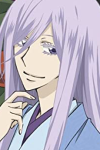


 Nao Yorihime


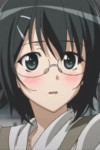


 Akane Ukita


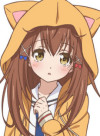


 Yui Narumi


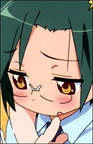


 Rikako Ouryou


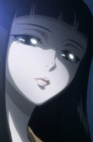

In [5]:
# Here we define our query as a multi-line string
import requests as requests
import pandas as pandas
import os as os
from PIL import Image as img
from io import BytesIO
from IPython.display import Image, display

query = '''
query ($page: Int, $perPage: Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        characters(sort: FAVOURITES_DESC, isBirthday : true){
            name {
              full
            }
            dateOfBirth {
              month
              day
            }
            favourites
            image {
              medium
            }
      }
    }
}
'''
variables = {
    'page': 1,
    'perPage': 10
}
url = 'https://graphql.anilist.co'

response = requests.post(url, json={'query': query, 'variables': variables})

resultDict = response.json()['data']['Page']['characters']
resultDataFrame  = pandas.json_normalize(resultDict)
display(resultDataFrame)

name_to_image = dict()

for character in resultDict:
    print("Extracting picture of ", character['name']['full'], " from ", character['image']['medium'])
    img_response = requests.get(character['image']['medium'])
    img_data = img_response.content
    img_path = img_response.headers['x-bz-file-name']
    name_to_image[character['name']['full']] = img.open(BytesIO(img_response.content))
    os.makedirs(os.path.dirname(img_path), exist_ok=True)
    with open(img_response.headers['x-bz-file-name'], 'wb') as handler:
        handler.write(img_data)

for name in list(name_to_image.keys())[5:]:
    print("\n",name)
    display(name_to_image[name])


## 2.2 Combine data into new content

Display their pictures into a single combined imaged saved locally. (Dont' worry about aspect ratio)

,favourites,name.full,dateOfBirth.month,dateOfBirth.day,image.medium
0,1087,Hyoma Chigiri,12,23,https://s4.anilist.co/file/anilistcdn/characte...
1,517,Mafuyu Hoshikawa,12,23,https://s4.anilist.co/file/anilistcdn/characte...
2,232,Otonoshin Koito,12,23,https://s4.anilist.co/file/anilistcdn/characte...
3,206,Amiya,12,23,https://s4.anilist.co/file/anilistcdn/characte...
4,151,Marik Ishtar,12,23,https://s4.anilist.co/file/anilistcdn/characte...
5,124,Komurasaki,12,23,https://s4.anilist.co/file/anilistcdn/characte...
6,103,Lucia Konohana,12,23,https://s4.anilist.co/file/anilistcdn/characte...
7,103,Nayuki Minase,12,23,https://s4.anilist.co/file/anilistcdn/characte...
8,77,Motoka Nogisaka,12,23,https://s4.anilist.co/file/anilistcdn/characte...
9,68,Yagyuu,12,23,https://s4.anilist.co/file/anilistcdn/characte...


Extracting picture of  Hyoma Chigiri  from  https://s4.anilist.co/file/anilistcdn/character/medium/b167444-JTHkkJAX4E3q.png
Extracting picture of  Mafuyu Hoshikawa  from  https://s4.anilist.co/file/anilistcdn/character/medium/b123079-yIi9ZmtZrlS1.png
Extracting picture of  Otonoshin Koito  from  https://s4.anilist.co/file/anilistcdn/character/medium/b128971-Q0eIaHh0QffS.png
Extracting picture of  Amiya  from  https://s4.anilist.co/file/anilistcdn/character/medium/b174801-TMQak4mRHb1p.jpg
Extracting picture of  Marik Ishtar  from  https://s4.anilist.co/file/anilistcdn/character/medium/5287.jpg
Extracting picture of  Komurasaki  from  https://s4.anilist.co/file/anilistcdn/character/medium/b131435-9xVeZr0tDlyP.png
Extracting picture of  Lucia Konohana  from  https://s4.anilist.co/file/anilistcdn/character/medium/b40812-VRNNqzP0NgKk.png
Extracting picture of  Nayuki Minase  from  https://s4.anilist.co/file/anilistcdn/character/medium/248.jpg
Extracting picture of  Motoka Nogisaka  from  ht

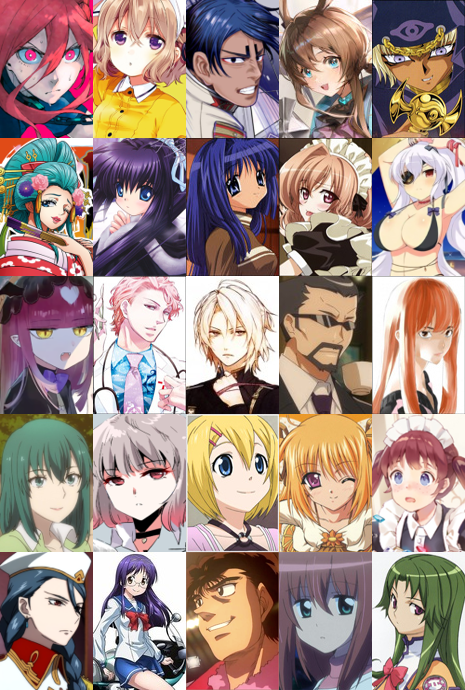

In [4]:
# Here we define our query as a multi-line string
import math
from io import BytesIO

import numpy as np
import pandas as pandas
import requests as requests
from IPython.core.display_functions import display
from PIL import Image as pil_image

query = '''
query ($page: Int, $perPage: Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        characters(sort: FAVOURITES_DESC, isBirthday : true){
            name {
              full
            }
            dateOfBirth {
              month
              day
            }
            favourites  
            image {
              medium
            }
      }
    }
}
'''
variables = {"page": 1, "perPage": 25}
url = 'https://graphql.anilist.co'

response = requests.post(url, json={'query': query, 'variables': variables})

resultDict = response.json()['data']['Page']['characters']
resultDataFrame = pandas.json_normalize(resultDict)
display(resultDataFrame)

all_images = []

for character in resultDict:
    print("Extracting picture of ", character['name']['full'], " from ", character['image']['medium'])
    img_response = requests.get(character['image']['medium'])
    all_images.append(pil_image.open(BytesIO(img_response.content)))

min_shape = sorted([(np.sum(i.size), i.size) for i in all_images])[0][1]
all_images = [img.resize(min_shape) for img in all_images]

widths, heights = zip(*(i.size for i in all_images))

# number of image per row
m = col_size = 5
n = row_size = math.ceil(len(all_images) / m)
#

final = [all_images[i * m:(i + 1) * m] for i in range((len(all_images) + m - 1) // m )]

total_width = max(widths) * m
total_height = max(heights) * n
#
new_im = pil_image.new('RGB', (total_width, total_height))
#
y_offset = 0
for horizontal_imgs in final:
    x_offset = 0
    for im in horizontal_imgs:
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[0]
    y_offset += im.size[1]
#
# new_im.show();
display(new_im)
# new_im.save('test.jpg')

The formatted dataframe extracted in this exercices could be converted to JSON and exploited by a webpage to populate its content.
The generated pictures could also be displayed on such webpage.
But those front-end matter is not our focus for now, we only care about back-end:
- data extraction with GrahpQl
- organising the data into dataframe
- exploiting the data to generate new content